<a href="https://colab.research.google.com/github/mrsferret/Machine-Learning-ITNPBD6-/blob/main/ExerciseSession3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kNN in Python

In this exercise, we will train and test a k Nearest Neighbours classifier using the sklearn library.

In prior practicals, you learned a number of different phases to the machine learning process, and they are necessary for us to perform again.

(remember, click on a cell, then control+enter will run it)


Let's recap:

Load the data as you did in your last exercise with Python, ensuring that the path to your data is correct.

In [3]:
import pandas as pd
import numpy as np

# remember to change this path if you've saved the data somewhere else
df=pd.read_csv("iris.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

and inspect the data (an important habit to get into)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Select the features to train the model, and set the species variable as the target

In [4]:
# set features and targets
targetName="species"


featureNames=df.columns[df.columns != targetName]
X = df[featureNames]
y = df[targetName]
print("X: ", X)
print("y: ", y)

X:       sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
y:  0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


Split the data into training and testing - remember that it's of utmost importance to ensure that some of the data is kept out of the training process so that we can independently evaluate the model.

In [5]:
# Use the train_test_split function provided by sklearn
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% testing. Setting the random_state will ensure replicability.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print("X_train: ", X_train)
print("X_test: ", X_test)
print("y_train: ", y_train)
print("y_test: ", y_test)

X_train:       sepal_length  sepal_width  petal_length  petal_width
14            5.8          4.0           1.2          0.2
24            4.8          3.4           1.9          0.2
139           6.9          3.1           5.4          2.1
58            6.6          2.9           4.6          1.3
8             4.4          2.9           1.4          0.2
..            ...          ...           ...          ...
107           7.3          2.9           6.3          1.8
21            5.1          3.7           1.5          0.4
0             5.1          3.5           1.4          0.2
131           7.9          3.8           6.4          2.0
106           4.9          2.5           4.5          1.7

[120 rows x 4 columns]
X_test:       sepal_length  sepal_width  petal_length  petal_width
47            4.6          3.2           1.4          0.2
3             4.6          3.1           1.5          0.2
31            5.4          3.4           1.5          0.4
25            5.0          3.

This example data set is already clean and ready to use, so we can skip the cleaning and data preparation stages this time.

Now your data is ready, we can create our kNN model! Begin by importing it from sklearn, and setting the number of neighbours that we wish to consider (k). We begin with the 5 nearest datapoint neighbours.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Number of neighbours
k = 5
knn_clf = KNeighborsClassifier(n_neighbors = k)

# Train the model
knn_clf.fit(X_train, y_train)
print(knn_clf)

KNeighborsClassifier()


And that's it! Our model has been created, but now we need to evaluate it. We can ask it to make predictions based on the test data like this:

In [7]:
y_pred = knn_clf.predict(X_test)

And now y_pred contains the predicted classes of each instance in the training set... you can see the predictions like this:

In [ ]:
y_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor'],
      dtype=object)

And now we can compare these predictions (y_pred) to the actual values for those instances (y_test). To find the percentage that are correct, we can do this:

In [8]:
test_count = y_test.shape[0]
print(sum(y_test == y_pred)/test_count)

0.9666666666666667


But thankfully, sklearn makes calculating metrics easy for us as well. If you want to find the accuracy of your model on unseen data, try this:

In [9]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


Before moving on, look up the scikit-learn documentation on the Confusion Matrix. Try adding one in the box below and see how well the kNN model does on different Iris classes.

In [10]:
# you might want to try one of these two implementations.
# The latter one looks nicer but only comes with more recent versions of Anaconda
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


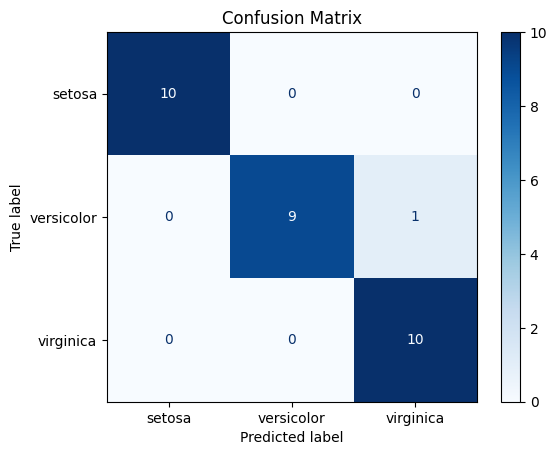

In [11]:
# call to confusion matrix function goes here

# Generate the confusion matrix

# Import necessary libraries for confusion matrix and display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

That's great, but testing the model on a single test set assumes that the test split was not unlucky. What we need to do, is use cross-validation. Begin by importing the cross_val_score function from sklearn.

In [12]:
# import cross validation function
from sklearn.model_selection import cross_val_score

# Now, compute scores for the 5 folds (this makes 5 seperate models, and tests them
# each on a different 0.2 of the data set- returning a list of these scores).
cv_scores = cross_val_score(knn_clf, X_train, y_train, cv=5)

# print the mean of the list of scores
print("cv_scores mean: {}".format(np.mean(cv_scores)))

cv_scores mean: 0.9666666666666666


You should get a pretty high accuracy (over 0.9 or 90%)... But as we mentioned before Iris is fairly easy to model. Let’s try using a different dataset. Try going back and changing the file to the MotorClaims.csv that you downloaded for this session, and set the target name to "Claim_Yes". You'll also need to look up what you learned about encoding variables in week 1's practical (hint: get_dummies), because the motor claims data has some non-numerical variables.

Compare the kNN performance on the train and test data, and using cross validation. With a more complicated problem, we can see that our model typically performs worse on unseen data - just as we would expect.


Now that you have a model in python, go back and experiment with the number of neighbours - how did this effect the cross validation accuracy score? Where the increases or decreases in the CV score reflected by changes in the accuracy observed on unseen data?

# Decision Trees in Python

We have already seen how to create kNN models in python, and because we are using the sklearn library, testing other models means changing only small pieces of our code.

Just like before, we are going to import the dataset set the target and feature variables, and split the data into training and testing data (this cell is not necessary if you have already run all of this code earlier in this notebook).


In [ ]:
import pandas as pd
import numpy as np

# remember to change this path if you've saved the data somewhere else
df=pd.read_csv("iris.csv")

# set features and targets
targetName="species"
df.columns.get_loc(targetName)
featureNames=df.columns[np.where(df.columns != targetName)]
X = df[featureNames]
y = df[targetName]

# Use the train_test_split function provided by sklearn
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% testing. Setting the random_state will ensure replicability.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

And now we're ready to create our Decision Tree models

In [13]:
# import decision tree from sklearn
from sklearn import tree

# create and train the model
tree_clf = tree.DecisionTreeClassifier(max_depth=2)
# tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train, y_train)

And just like the kNN model, this is all it takes! Let's try evaluating it just like we did with the previous model.

In [ ]:
# import cross validation function
from sklearn.model_selection import cross_val_score

# Now, compute scores for the 5 folds (this makes 5 seperate models, and tests them
# each on a different 0.2 of the data set- returning a list of these scores).
cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)

# print the mean of the list of scores
print("cv_scores mean: {}".format(np.mean(cv_scores)))

cv_scores mean: 0.9416666666666668


And now let's see how it performs on the unseen (test) data

In [14]:
# make some predictions on unseen data
y_pred = tree_clf.predict(X_test)

# calculate accuracy of the predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


As we mentioned previously, a considerable advantage of Decision Trees are their explainability, and we can view the tree in python like this:

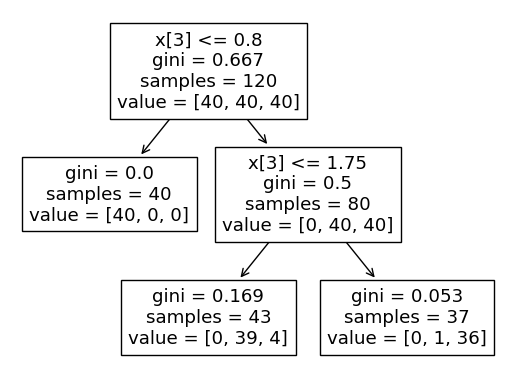

In [15]:
tree.plot_tree(tree_clf); # could just call this on its own to display the tree here

# these lines will save the tree so you can view it outside the browser
import matplotlib.pyplot as plt
plt.savefig('tree.svg',format='svg',bbox_inches = "tight")

This is quite difficult to read due to the variable encodings hiding the information. We can add more detail into our visualisation like this:

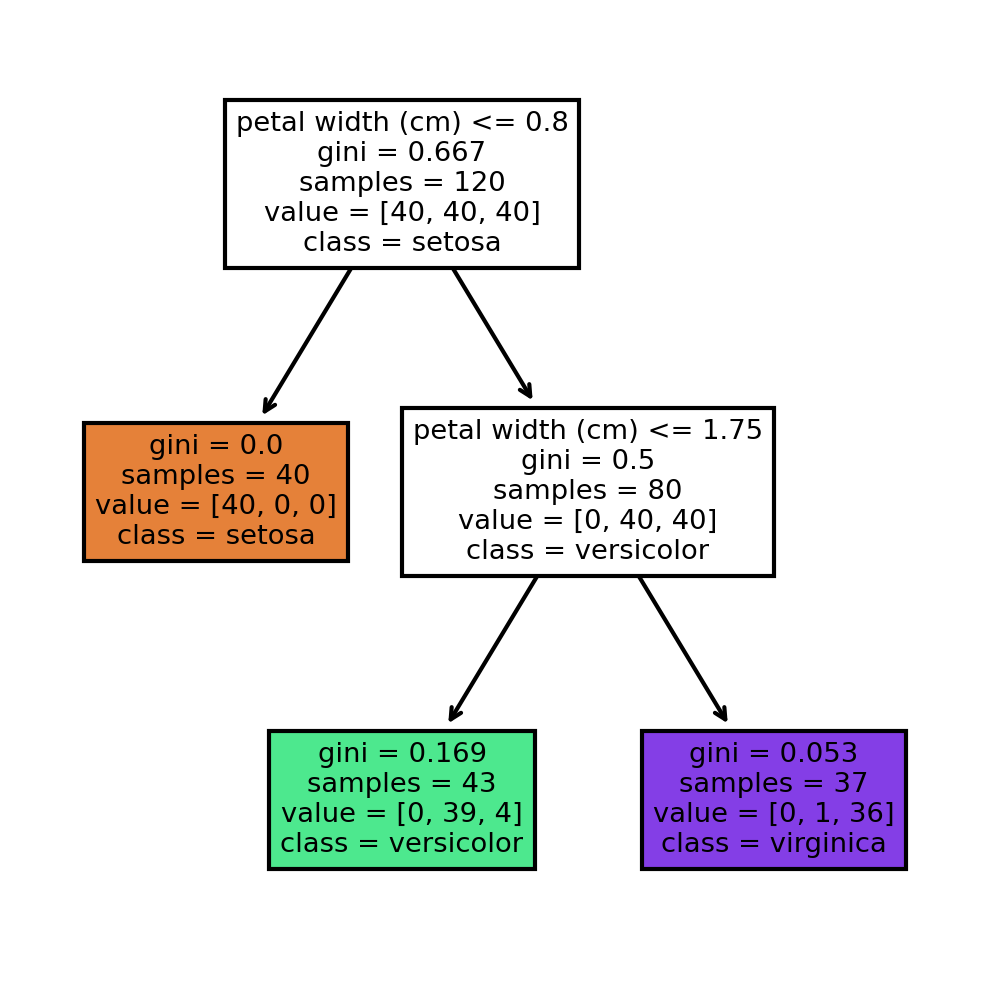

In [16]:
from matplotlib import pyplot as plt
var_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
class_names=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree_clf,
               feature_names = var_names,
               class_names=class_names,
               filled = True);

plt.savefig('tree_detailed.svg',format='svg',bbox_inches = "tight")

Now you can see exactly how the tree makes its classifications.

Each internal node contains a variable name, and a rule to split that variable on. You can also see how many instances among the training data reached that node in the tree, and how many fell into each class. At the leaf nodes (those with no child nodes connected to them) the data falls into one class (e.g., value=0,0,35 or value=40, 0, 0 ).

Choose one of the leaf nodes and make a list of all the nodes (and the subsequent rules) that led to the decision tree making that classification.

If you look up the documentation for [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) you'll see the various parameters that control the model's structure and learning. These parameters are designed to help us balance bias and variance: stopping the tree from creating overly complex rules that overfit to the training data and prevent generalisation to new datasets, but still allowing the tree to learn something from the training data. One of these parameters is `max_depth`, which helps to prevent the model overfitting by limiting how deep it can get. It defaults to "None", which means overfitting can easily happen, but we don't see it on the easy-to-model Iris data.  As before, change the dataset to MotorClaims.csv, and inspect the tree visualisation. It’s much more complicated now!

Make a note of the accuracy computed for cross validation. Change the creation of the tree above to look like this: `tree_clf = tree.DecisionTreeClassifier(max_depth=2)`. Now the tree is much simpler, and you should see that the leaf nodes are no longer "pure", but many have instances in more than one class.

Try changing the max_depth parameter; which value produces the highest accuracy value when running cross validation?

# Evaluating Classification Models

Now that we know how to create different models in python, we should look at how to compare them. Let's begin by loading our new dataset concerning defaulting credit holders. Note that we also changed the targetName to reflect this different dataset.

In [17]:
import pandas as pd
import numpy as np

# remember to change this path if you've saved the data somewhere else
df=pd.read_csv("creditDefault.csv")

# set features and targets
targetName="default payment next month"
df.columns.get_loc(targetName)
featureNames=df.columns[np.where(df.columns != targetName)]
X = df[featureNames]
y = df[targetName]

# Use the train_test_split function provided by sklearn
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% testing. Setting the random_state will ensure replicability.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

Now we will train a Decision Tree and kNN model to compare.

In [18]:
# import decision tree from sklearn
from sklearn import tree
# create and train the model
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
# create and train the model
k = 5 # Number of neighbours
knn_clf = KNeighborsClassifier(n_neighbors = k)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

Now that we have the kNN and Decision Tree models, we can evaluate them. Let's begin by performing k-fold cross validation (remember that this is a bigger dataset, and CV involves creating multiple models for evaluation, so this will take a little while)

In [19]:
# import cross validation function
from sklearn.model_selection import cross_val_score

# Now, compute scores for the 5 folds (this makes 5 seperate models, and tests them
# each on a different 0.2 of the data set- returning a list of these scores).
tree_cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)
knn_cv_scores = cross_val_score(knn_clf, X_train.values, y_train, cv=5) # ".values" is needed due to a bug in some sklearn builds that breaks dataframe functionality for knn

# print the mean of the list of scores
print("Decision Tree CV Score: {}".format(np.mean(tree_cv_scores)))
print("kNN CV Score:           {}".format(np.mean(knn_cv_scores)))

Decision Tree CV Score: 0.7214166666666667
kNN CV Score:           0.7457083333333333


This CV score defaults to the accuracy of the splits by default. If we want to find other metrics, we can ask cross_validate to calculate them for us by including them in an iterable passed with the keyword 'scoring'

In [20]:
from sklearn.model_selection import cross_validate
metrics_to_calculate = ['accuracy', 'roc_auc', 'precision', 'f1','recall']

tree_cv_scores = cross_validate(tree_clf, X_train, y_train, cv=5, scoring=metrics_to_calculate)
knn_cv_scores = cross_validate(knn_clf, X_train.values, y_train, cv=5, scoring=metrics_to_calculate)

print(tree_cv_scores)
print(knn_cv_scores)

{'fit_time': array([0.55901122, 0.59970522, 0.5600493 , 0.54266071, 0.65929818]), 'score_time': array([0.03222871, 0.02071595, 0.02005768, 0.02010918, 0.0315733 ]), 'test_accuracy': array([0.71270833, 0.715     , 0.725625  , 0.714375  , 0.72875   ]), 'test_roc_auc': array([0.59802126, 0.60279808, 0.61393678, 0.61394351, 0.62164938]), 'test_precision': array([0.36777583, 0.37358818, 0.39342806, 0.37990196, 0.40139616]), 'test_f1': array([0.3785489 , 0.38599641, 0.40217885, 0.4041721 , 0.4140414 ]), 'test_recall': array([0.38997214, 0.3992572 , 0.41132776, 0.43175487, 0.42750929])}
{'fit_time': array([0.00506663, 0.00404763, 0.00356269, 0.00503397, 0.00353169]), 'score_time': array([4.79951429, 4.07159734, 4.07884955, 4.86232948, 4.23035526]), 'test_accuracy': array([0.74020833, 0.75      , 0.745     , 0.74333333, 0.75      ]), 'test_roc_auc': array([0.60359765, 0.60258298, 0.60368881, 0.60044714, 0.60403007]), 'test_precision': array([0.35243056, 0.39076377, 0.36210131, 0.35459662, 0.38

Each of which can be extracted and calculated like this:

In [21]:
tree_f1_score = np.mean(tree_cv_scores['test_f1'])
print(tree_f1_score)

0.396987531097866


There are a wide range of different metrics available to test - here are all that are available within sklearn (remember that only some of these are applicable to classifiers!).

In [22]:
from sklearn.metrics._scorer import _SCORERS
sorted(_SCORERS.keys())

# older versions of scikit-learn need this instead:
#from sklearn.metrics import SCORERS
#sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

Similarly, as you've already seen earlier, calculating the confusion matrix in python is also quite simple. We simply pass the predicted labels and the actual labels to the confusion_matrix function like this:

In [23]:
from sklearn.metrics import confusion_matrix
knn_pred = knn_clf.predict(X_test.values)

# this produces a nicer result but seems to be broken in current scikit learn at time of writing
# knn_pred = knn_clf.predict(X_test)

confusion_matrix(y_test, knn_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[4304,  444],
       [1038,  214]])

# Ensembles

In this exercise, we are going to improve upon the Decision Trees we used earlier by creating ensemble models - specifically, we are going to use Bagging and Boosting.

Remember that ensembles train many models and use their outputs to form a single prediction. It's important to bear in mind that this often takes much longer to run. If you find it's taking too long on your machine, make the n_estimators smaller to speed up the execution time.

Just like before, we are going to import the dataset set the target and feature variables, and split the data into training and testing data.

In [24]:
import pandas as pd
import numpy as np

# remember to change this path if you've saved the data somewhere else
df=pd.read_csv("creditDefault.csv")

# set features and targets
targetName="default payment next month"
df.columns.get_loc(targetName)
featureNames=df.columns[np.where(df.columns != targetName)]
X = df[featureNames]
y = df[targetName]

# Use the train_test_split function provided by sklearn
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% testing. Setting the random_state will ensure replicability.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

Let's begin with a decision tree to form a baseline for comparison

In [32]:
# import decision tree from sklearn
from sklearn import tree

# create and train the model
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train, y_train)

Now we're ready to create our first ensemble method. Let's start with one of the most powerful and well known Bagging methods: Random Forests.

In [26]:
from sklearn.ensemble import RandomForestClassifier

rand_forest_clf = RandomForestClassifier(n_estimators=50, random_state=1)
rand_forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

And now, let's take one of the most popular Boosting methods: Adaboost.

In [27]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=1)
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

Note that both of these ensembles consist of 50 decision trees (n_estimators), but this can be varied according to the nature of the problem!

Now that we have examples, we should evaluate them against the original decision tree classifier.

In [30]:
# Now, compute scores for the 5 folds (this makes 5 seperate models, and tests them
# each on a different 0.2 of the data set- returning a list of these scores).
tree_cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5)
rand_forest_cv_scores = cross_val_score(rand_forest_clf, X_train, y_train, cv=5)
adaboost_cv_scores = cross_val_score(adaboost_clf, X_train, y_train, cv=5)

# print the mean of the list of scores
print("Decision Tree CV Score: {}".format(np.mean(tree_cv_scores)))
print("Random Forest CV Score: {}".format(np.mean(rand_forest_cv_scores)))
print("Adaboost CV Score:      {}".format(np.mean(adaboost_cv_scores)))

Decision Tree CV Score: 0.7218749999999999
Random Forest CV Score: 0.8140833333333333
Adaboost CV Score:      0.8135


Which method was most successful according to the cross validation accuracy?

My Answer:
Looks like Random Forest is the most successful

To demonstrate something quite interesting, try rerunning the cross validation cell above repeatedly and watch the results. Notice how the results are much more stable for the ensemble methods than they are for the decision tree?

How does this translate into performance on the testing set? Let's find out:

In [31]:
# Make the predictions using each model
y_pred_tree = tree_clf.predict(X_test)
y_pred_forest = rand_forest_clf.predict(X_test)
y_pred_adaboost = adaboost_clf.predict(X_test)

# print the accuracies on the test data
from sklearn import metrics
print("Decision Tree CV Score: {}".format(metrics.accuracy_score(y_test, y_pred_tree)))
print("Random Forest CV Score: {}".format(metrics.accuracy_score(y_test, y_pred_forest)))
print("Adaboost CV Score:      {}".format(metrics.accuracy_score(y_test, y_pred_adaboost)))

Decision Tree CV Score: 0.732
Random Forest CV Score: 0.8266666666666667
Adaboost CV Score:      0.8293333333333334


Did the ensemble methods improve upon the use of a single decision tree?

While creating an array of different decisions trees makes it somewhat more difficult to ascertain as to how the ensembles make their decisions, we should note that it is possible to extract individual trees (estimators) and plot them using the code below. Remember, the idea of an ensemble is that it comprises lots of simple models, so the extracted trees tend to be quite small.

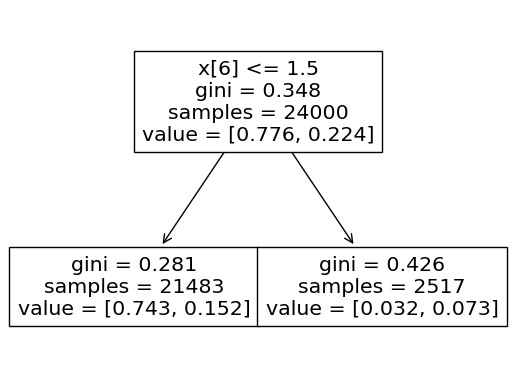

In [33]:
tree.plot_tree(adaboost_clf.estimators_[0]);

And for an overview, we can also inspect the feature importances according to the ensemble. These are a good guide as to which features were most important when training the models, but don't rely on them completely - there are slight nuances to how these are calculated which can lead to slightly misleading importances.

We'll come back to this idea later in the course.

In [34]:
adaboost_clf.feature_importances_

array([0.  , 0.06, 0.02, 0.04, 0.04, 0.02, 0.14, 0.1 , 0.04, 0.  , 0.02,
       0.02, 0.12, 0.04, 0.08, 0.04, 0.  , 0.02, 0.06, 0.06, 0.04, 0.04,
       0.  , 0.  ])

# Under- and Over Sampling
Revisiting credit default data set, we see that it is actually somewhat imbalanced:

<Axes: xlabel='default payment next month'>

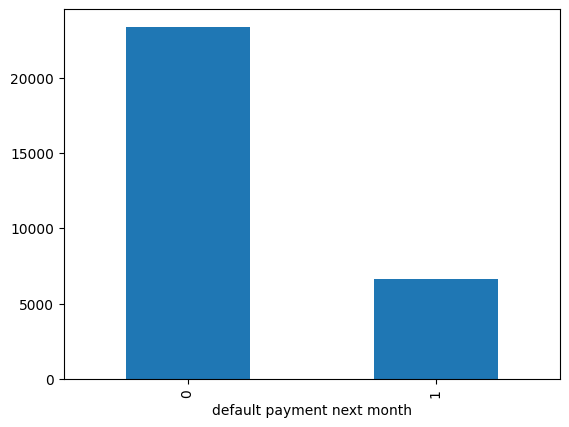

In [35]:
import pandas as pd
import numpy as np

# remember to change this path if you've saved the data somewhere else
df=pd.read_csv("creditDefault.csv")

# set features and targets
targetName="default payment next month"
df.columns.get_loc(targetName)
featureNames=df.columns[np.where(df.columns != targetName)]
X = df[featureNames]
y = df[targetName]

y.value_counts().plot(kind='bar')

So, the 0 class has more instances than the 1 class.

We tried undersampling in Week 1. We are taking a random selection of the instances from the majority class, so that the two classes have the same number of instances...

<Axes: xlabel='default payment next month'>

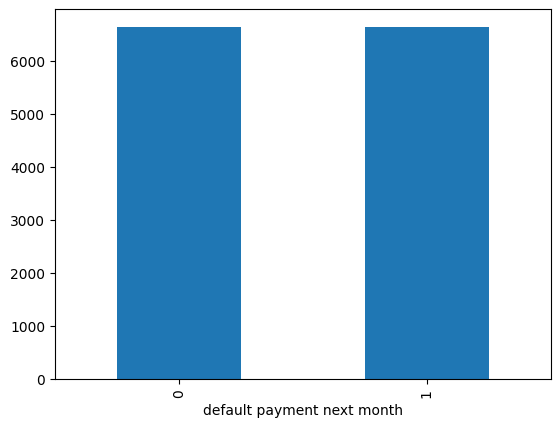

In [36]:
g = df.groupby(targetName)
df_undersampled = g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True)

# can do this if using Pandas > 1.1.0
#df_undersampled = g.sample(g.size().min()).reset_index(drop=True)

X_undersampled = df_undersampled[featureNames]
y_undersampled = df_undersampled[targetName]

y_undersampled.value_counts().plot(kind='bar')

Oversampling can follow the same process, but this time we sample the smaller class. We are allowed to choose the same instance more than once (`replace=True`), so what's happening is that we're duplicating the data until the two classes are the same size. This is fairly crude: an alternative is to use SMOTE, which doesn't just duplicate the instances but also adds some variation to them. We won't cover that here but you are welcome to read up on this in your own time. [This](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) is a good tutorial on implementing SMOTE.

<Axes: xlabel='default payment next month'>

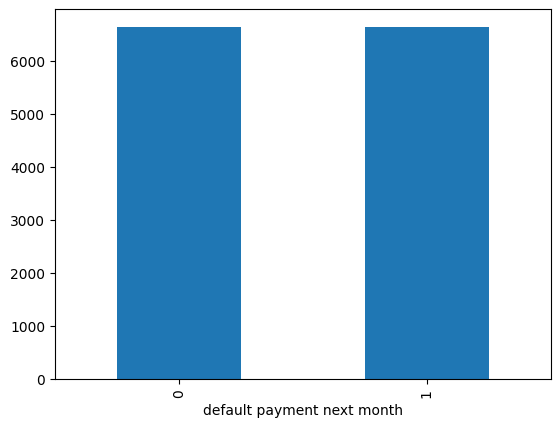

In [37]:
g = df.groupby(targetName)
df_oversampled = g.apply(lambda x: x.sample(g.size().max(), replace=True)).reset_index(drop=True)

# can do this if using Pandas > 1.1.0
#df_oversampled = g.sample(g.size().max(), replace=True).reset_index(drop=True)

X_oversampled = df_undersampled[featureNames]
y_oversampled = df_undersampled[targetName]

y_oversampled.value_counts().plot(kind='bar')

Now let's try fitting a kNN model for each data set and use a confusion matrix to see how well they're doing.

In [38]:
# Use the train_test_split function provided by sklearn
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing. Setting the random_state will ensure replicability.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

X_undersampled_train, X_undersampled_test, y_undersampled_train, y_undersampled_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=3)
X_oversampled_train, X_oversampled_test, y_oversampled_train, y_oversampled_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=3)

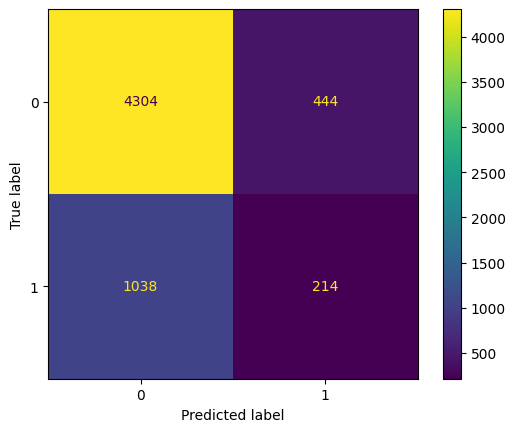

In [39]:
# original data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn_clf = KNeighborsClassifier()#n_neighbors = 5)
knn_clf.fit(X_train.values, y_train)

y_pred = knn_clf.predict(X_test.values)
#ConfusionMatrixDisplay.from_predictions(y_test, y_pred) # sklearn 1.0 onwards
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


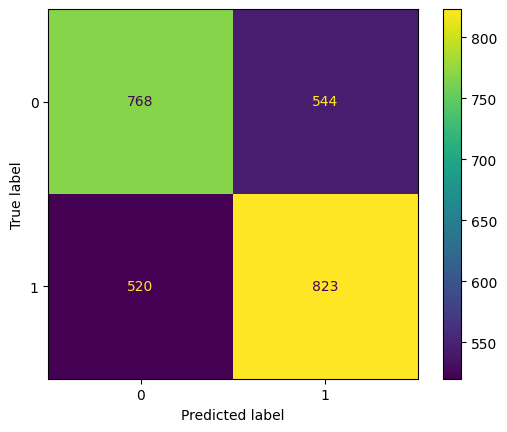

In [40]:
# undersampled data
knn_clf.fit(X_undersampled_train, y_undersampled_train)

y_undersampled_pred = knn_clf.predict(X_undersampled_test.values)
#ConfusionMatrixDisplay.from_predictions(y_undersampled_test, y_undersampled_pred) # sklearn 1.0 onwards
import matplotlib.pyplot as plt
cm = confusion_matrix(y_undersampled_test, y_undersampled_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

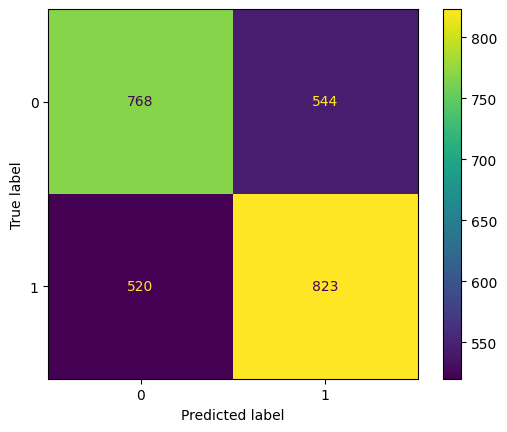

In [41]:
# original data
knn_clf.fit(X_oversampled_train.values, y_oversampled_train)

y_oversampled_pred = knn_clf.predict(X_oversampled_test.values)
#ConfusionMatrixDisplay.from_predictions(y_oversampled_test, y_oversampled_pred) # sklearn 1.0 onwards
import matplotlib.pyplot as plt
cm = confusion_matrix(y_oversampled_test, y_oversampled_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

With the original data, it gets the majority class (0) right most of the time, but it also gets the minority class (1) wrong most of the time. With the rebalanced data, we have sacrificed some of our accuracy on the majority class (0) to greatly improve accuracy on the minority class (1). Clearly the models are far from perfect: the error rate is still quite high, but the point is that we are now doing much better than we were doing with the unbalanced data.